In [1]:
!pip install tensorboardcolab

# Import files to the notebook




In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

KeyboardInterrupt: ignored

# Import libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import data and preprocess it

In [34]:
filepath = 'data_op_01_sensor_Navar.csv'
data_op_1 = pd.read_csv(filepath, index_col=0)
data_op_1.head()

,Sensor_1,Sensor_2,Sensor_3,Sensor_6,Sensor_8,Sensor_10,Sensor_11,Sensor_12,Sensor_13,Sensor_14,Sensor_19,Sensor_20,Health_state
0,604.13,1499.45,1309.95,394.88,8770.20,45.40,372.15,2388.13,8120.83,8.6216,28.58,17.1735,1
14,604.63,1497.87,1302.51,394.93,8771.08,45.39,371.84,2388.12,8124.37,8.6496,28.84,17.0805,1
15,604.61,1500.47,1311.39,394.44,8775.86,45.52,372.19,2388.08,8127.07,8.6609,28.71,17.1759,1
17,604.23,1502.57,1304.56,394.31,8778.55,45.10,372.03,2388.06,8119.39,8.6646,28.60,17.1096,1
35,604.43,1499.85,1306.89,394.36,8771.15,45.36,371.77,2388.11,8121.73,8.6260,28.52,17.1036,2


In [0]:
X = data_op_1.drop('Health_state', axis=1)
y = data_op_1['Health_state'] - 1

import keras

y_categorical = keras.utils.to_categorical(y, num_classes=len(y.unique()))

In [0]:
from sklearn.preprocessing import StandardScaler

tf_std = StandardScaler()

X_std = tf_std.fit_transform(X)

# Create a keras model

In [42]:
import keras
from keras import Sequential
from keras.layers import Dense, Activation

from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback
from time import time

tbc=TensorBoardColab()

Wait for 8 seconds...
TensorBoard link:
https://f1756b7b.ngrok.io


## Define the model

In [0]:
model = Sequential()

model.add(Dense(100, input_shape=(X_std.shape[1],), activation='tanh'))
# model.add(Dense(50, activation='relu'))
# model.add(Dense(20, activation='relu'))
model.add(Dense(len(y.unique()), activation='tanh'))

## Compile the model

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# tensorboard = TensorBoard(log_dir="logs/{}".format(time()))

In [0]:
history = model.fit(X_std, y_categorical, epochs=500, validation_split=0.2, shuffle=False, verbose=0, callbacks=[TensorBoardColabCallback(tbc)])

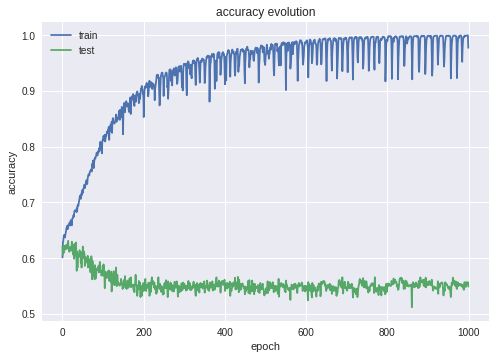

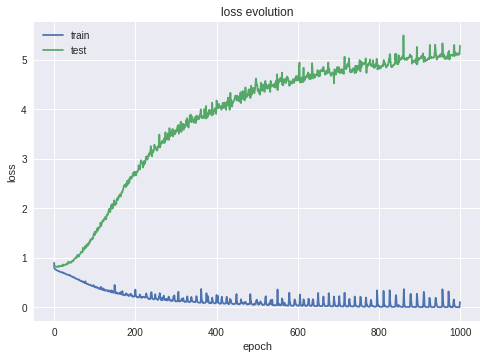

True

In [11]:
def plot_history(history,show=True):
  

    # summarize history for accuracy
    plt.plot(history['acc'])
    plt.plot(history['val_acc'])
    plt.grid(True)
    plt.title('accuracy evolution')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

    if (show): 
      plt.show()
    else: 
      plt.clf()
      
    # summarize history for loss
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.grid(True)
    plt.title('loss evolution')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    
    if (show): 
      plt.show()
    else: 
      plt.clf()

    return True

import seaborn as sns

plot_history(history.history,show=True)